In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Ecommerce Customers")
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

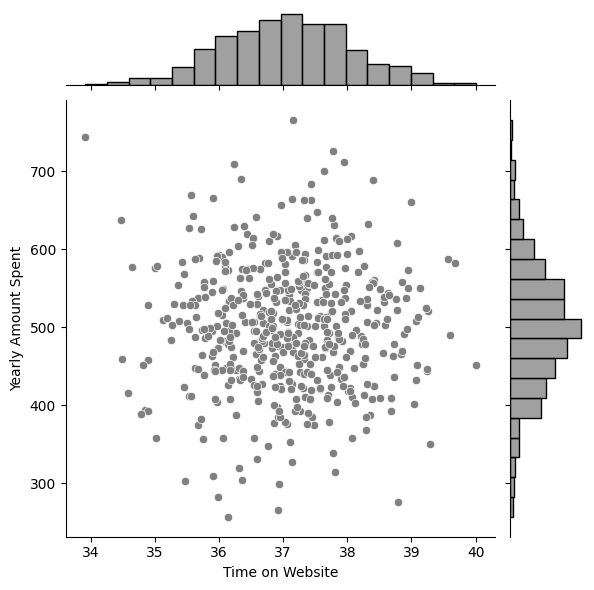

In [6]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=data,
              color='grey')

** Do the same but with the Time on App column instead. **

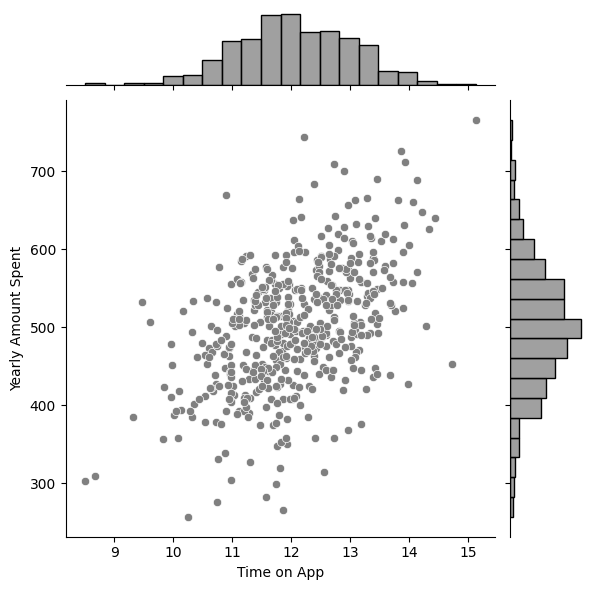

In [7]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=data,
              color='grey')

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

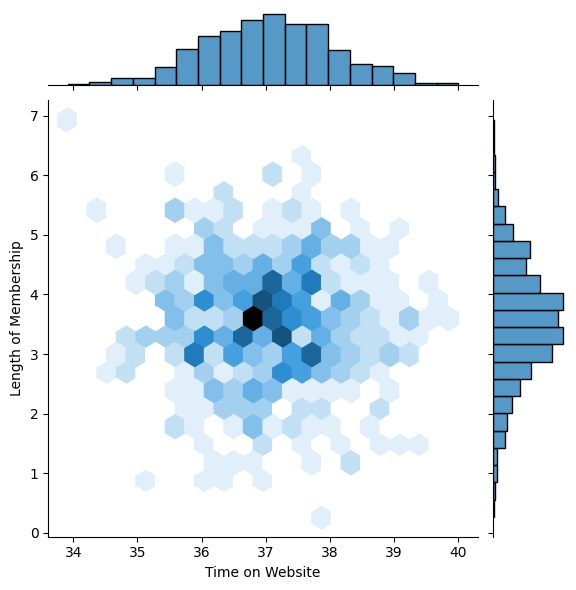

In [9]:
sns.jointplot(x='Time on Website',y='Length of Membership',data=data,
              kind='hex')


**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

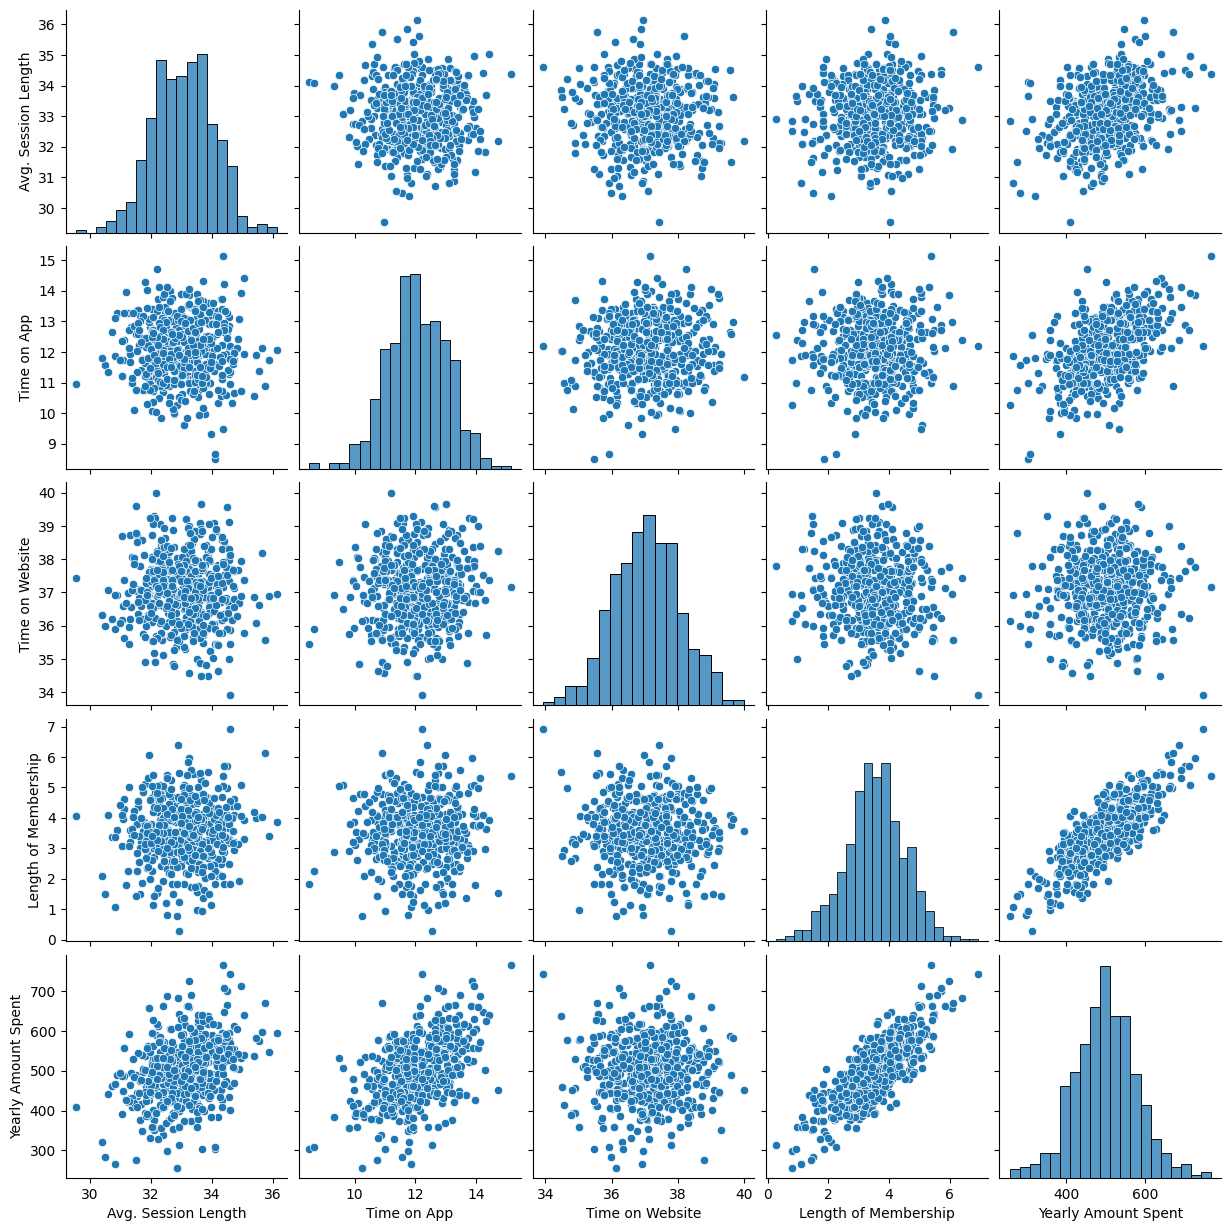

In [10]:
sns.pairplot(data)

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

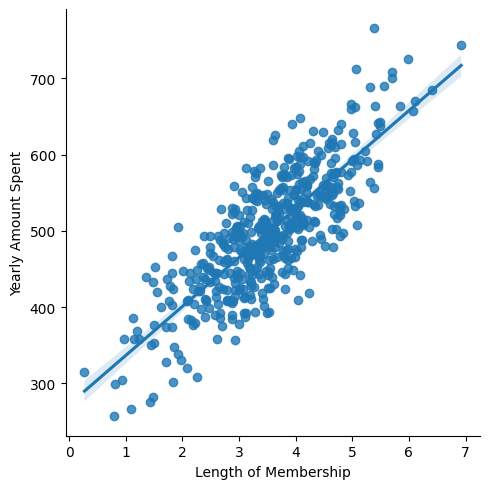

In [13]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

In [14]:
y=data["Yearly Amount Spent"]
x=data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm=LinearRegression()

In [18]:
lm.fit(x_train,y_train)

LinearRegression()

In [19]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [25.72425621 38.59713548  0.45914788 61.67473243]


In [20]:
predictions=lm.predict(x_test)

Text(0, 0.5, 'Predicted Y')

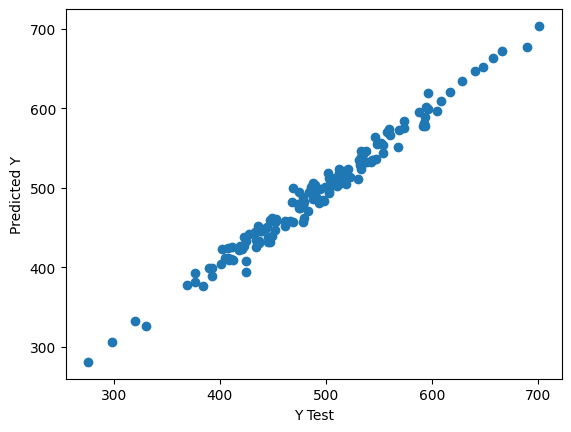

In [21]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae= mean_absolute_error(y_test,predictions)
mse=mean_squared_error(y_test,predictions)
rmse=np.sqrt(mse)
print("MAE: ",mae)
print("MSE: ",mse)
print("RMSE: ",rmse)

MAE:  8.426091641432116
MSE:  103.91554136503333
RMSE:  10.193897260863155


(array([[ 1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  2.,  1.,
          3.,  2.,  7.,  3.,  6.,  8.,  5.,  8.,  3.,  4., 10.,  7.,  5.,
          9., 10.,  7.,  3.,  8.,  6.,  4.,  2.,  4.,  0.,  2.,  6.,  2.,
          1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  1.,  1.],
        [ 1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  1.,
          3.,  3.,  6.,  0.,  8.,  8.,  6.,  5., 11.,  1.,  6.,  7.,  5.,
         11., 11.,  7.,  6.,  6.,  4.,  4.,  2.,  3.,  4.,  2.,  3.,  2.,
          0.,  2.,  1.,  0.,  2.,  0.,  1.,  2.,  0.,  0.,  1.]]),
 array([275.91842065, 284.47665902, 293.03489738, 301.59313574,
        310.15137411, 318.70961247, 327.26785084, 335.8260892 ,
        344.38432757, 352.94256593, 361.5008043 , 370.05904266,
        378.61728103, 387.17551939, 395.73375776, 404.29199612,
        412.85023449, 421.40847285, 429.96671122, 438.52494958,
        447.08318795, 455.64142631, 464.19966468, 472.75790304,
        481.31614141, 489.87437977, 498.

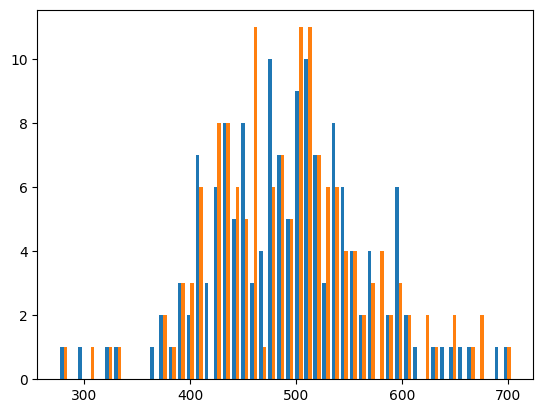

In [23]:
plt.hist((y_test,predictions),bins=50)

In [24]:
coefficients=pd.DataFrame(lm.coef_,x.columns)
coefficients.columns=["Coiefficient"]
coefficients

,Coiefficient
Avg. Session Length,25.724256
Time on App,38.597135
Time on Website,0.459148
Length of Membership,61.674732
